<a href="https://colab.research.google.com/github/anavianascientist/Tratamento_De_Dados/blob/master/Dados_Tratados_Tempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATASET : TEMPO

Nesse projeto de "Limpeza e Tratamento de dados. 
Devemos a partir do Dataset inicial obtermos os seguintes dados :
>> - Aparência : sol, nublado, chuva
>> - Temperatura : -130 a 130F
>> - Umidade : 0 a 100
>> - Jogar: Sim/Não
>> - Tratar valores nulos





In [1]:
# Importar bibliotecas necessárias
import pandas as pd
import seaborn as sea
import statistics as sta

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
# Importar os dados que serão utilizados
from google.colab import files
uploaded = files.upload()

Saving tempo.csv to tempo.csv


In [3]:
import pandas as pd

import io
dataset = pd.read_csv(io.BytesIO(uploaded['tempo.csv']), sep=';')

dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [4]:
#tamanho 
dataset.shape

(14, 5)

In [5]:
#explorar dados categoricos
#aparencia
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

Text(0.5, 1.0, 'Aparencia')

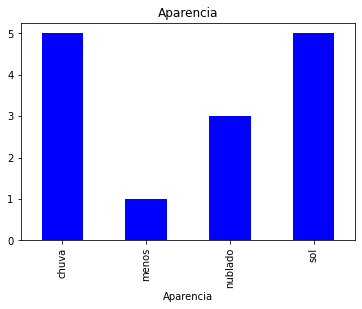

In [9]:
agrupado.plot.bar(color = 'blue').set_title('Aparencia')

In [10]:
# Vento
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

Text(0.5, 1.0, 'Vento')

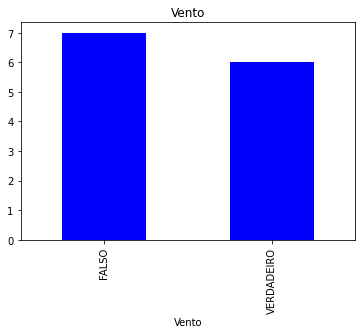

In [11]:
agrupado.plot.bar(color = "blue").set_title('Vento')

In [12]:
#jogar
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

Text(0.5, 1.0, 'Jogar')

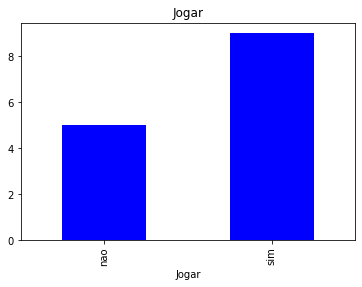

In [13]:
agrupado.plot.bar(color = 'blue').set_title('Jogar')

In [16]:
import seaborn as sea

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [14]:
#Explorar agora as colunas numéricas
#temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

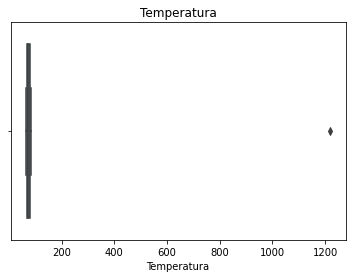

In [18]:
sea.boxplot(dataset['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Temperatura')

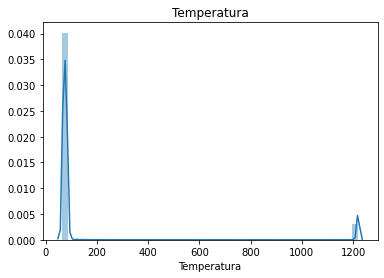

In [19]:
sea.distplot(dataset['Temperatura']).set_title('Temperatura')

In [21]:
#umidade
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

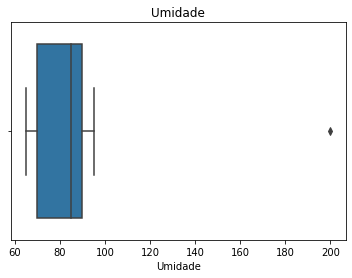

In [22]:
sea.boxplot(dataset['Umidade']).set_title('Umidade')

Text(0.5, 1.0, 'Umidade')

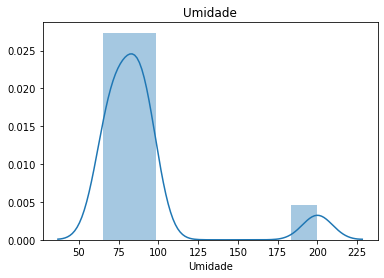

In [23]:
sea.distplot(dataset['Umidade']).set_title('Umidade')

In [24]:
#Contando valores NAN
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [25]:
#Umidade
#Substituir NAN e incluir a mediana
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [27]:
import statistics as sta

In [28]:
mediana = sta.median(dataset['Umidade'])
mediana

85.5

In [29]:
#substituir NAN por mediana
dataset['Umidade'].fillna(mediana, inplace=True)

In [31]:
#NAN não existe mais
dataset['Umidade'].isnull().sum()

0

In [38]:
#Vento
dataset['Vento'].fillna('FALSO', inplace=True)


In [39]:
#Verificando NAN em Vento
dataset['Vento'].isnull().sum()


0

In [41]:
#Aparencia fora do domino
agrupado = dataset.groupby(['Aparencia']).size()
agrupado


Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [44]:
#Vamos atribuir chuva / sol(moda)
dataset.loc[dataset['Aparencia'].isin(['menos']), 'Aparencia'] = 'chuva'
agrupado = dataset.groupby(['Aparencia']).size()


In [45]:
#Resultado
agrupado

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

In [47]:
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [48]:
#Outliers em Temperatura - consideremos 2 desvios padrao
desv = sta.stdev(dataset['Temperatura'])
desv

306.433758505241

In [ ]:
#Definir padrão como maior que 2 desvios padrão
#checamos se algum atende critério
dataset.loc[dataset['Temperatura'] >= 2 * desv]


,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [51]:
#Atualizar temperatura para mediana
mediana = sta.median(dataset['Temperatura'])
mediana

73.5

In [52]:
#atribuir
dataset.loc[dataset['Temperatura'] >= 2 * desv, 'Temperatura'] = mediana
# checar se algum criterio atende
dataset.loc[dataset['Temperatura'] >= 2 *desv]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [53]:
dataset['Umidade'].describe()

count     14.000000
mean      89.464286
std       33.204763
min       65.000000
25%       71.250000
50%       85.250000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [54]:
#Outliers em Umidade - consideremos 2 desvios padrao
desv = sta.stdev(dataset['Umidade'])
desv

33.204763493832004

In [55]:
# Padrão 2 desvios padrão | Checar se algum critério atende
dataset.loc[dataset['Umidade'] >= 2 * desv]



,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,200.0,FALSO,sim
10,sol,75.0,70.0,VERDADEIRO,sim


In [56]:
# Atualizar umidade pela mediana
mediana = sta.median(dataset['Umidade'])
mediana

85.25

In [56]:
#atribuir
dataset.loc[dataset['Umidade'] >= 2 * desv] = mediana
#checar se algum critério serve
dataset.loc[dataset['Umidade'] >= 2 * desv ]

In [57]:
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
